In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [289]:
df = pd.read_csv("classification_challenge_training.csv") # read in the census-derived data; mind the separator
test = pd.read_csv("classification_challenge_submission.csv") # read in the census-derived data; mind the separator

d={'11th':"HS-non-grad", 'HS-grad':'HS-grad', '10th':"HS-non-grad", 'Assoc-voc':'College', 'Bachelors':'College', \
   'Some-college':'Some-college','Assoc-acdm':'College', '12th':"HS-non-grad", 'Doctorate':'Higher-Level Education', \
   'Masters':'Higher-Level Education','9th':"HS-non-grad", '5th-6th':"HS-non-grad",'1st-4th':"HS-non-grad",\
   'Prof-school':'College', '7th-8th':"HS-non-grad", 'Preschool':"HS-non-grad"}
df['education']=df['education'].apply(lambda x: d[x])

df = df[df['type_employer'] != 'Never-worked']
df1 = pd.get_dummies(df,columns = ['type_employer','education','marital', 'occupation','relationship','race','sex'])
y=df1["income"].copy()
del df1['income']
del df1['country']
del df1['Unnamed: 0']

In [281]:
df['type_employer'].values()

Index([u'Unnamed: 0', u'age', u'type_employer', u'education', u'education_num',
       u'marital', u'occupation', u'relationship', u'race', u'sex',
       u'capital_gain', u'capital_loss', u'hr_per_week', u'country',
       u'income'],
      dtype='object')

In [226]:
# dummies = pd.get_dummies(df,columns = ['country'])
# delete=[u'age', u'type_employer', u'education', u'education_num', u'marital',
#        u'occupation', u'relationship', u'race', u'sex', u'capital_gain',
#         u'capital_loss', u'hr_per_week', u'income', u'country_?',"Unnamed: 0"]
# for x in delete:
#     del dummies[x]
# cols=dummies.columns
# dummies['education_num'] = df['education_num']
# dummies[''] = df['education_num']
# dummies["Unnamed: 0"]=df["Unnamed: 0"]
# i=0

# for z in cols:
#     name=z+"_new"
#     dummies[name]=dummies['education_num']*dummies[z]
# df1=df1.merge(dummies)
# del df1["Unnamed: 0"]

In [283]:
"""Clean/munge your data."""
X_train, X_test, y_train, y_test = train_test_split(df1,y,test_size=.33, random_state=77)

""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='liblinear')
C_vals = np.linspace(.47,.61,50)
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

In [284]:
gs.best_params_

{'C': 0.47285714285714281, 'penalty': 'l2'}

           predicted_over50k  predicted_under50k
over_50k                1196                 755
under_50k                480                5626
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      6106
          1       0.71      0.61      0.66      1951

avg / total       0.84      0.85      0.84      8057



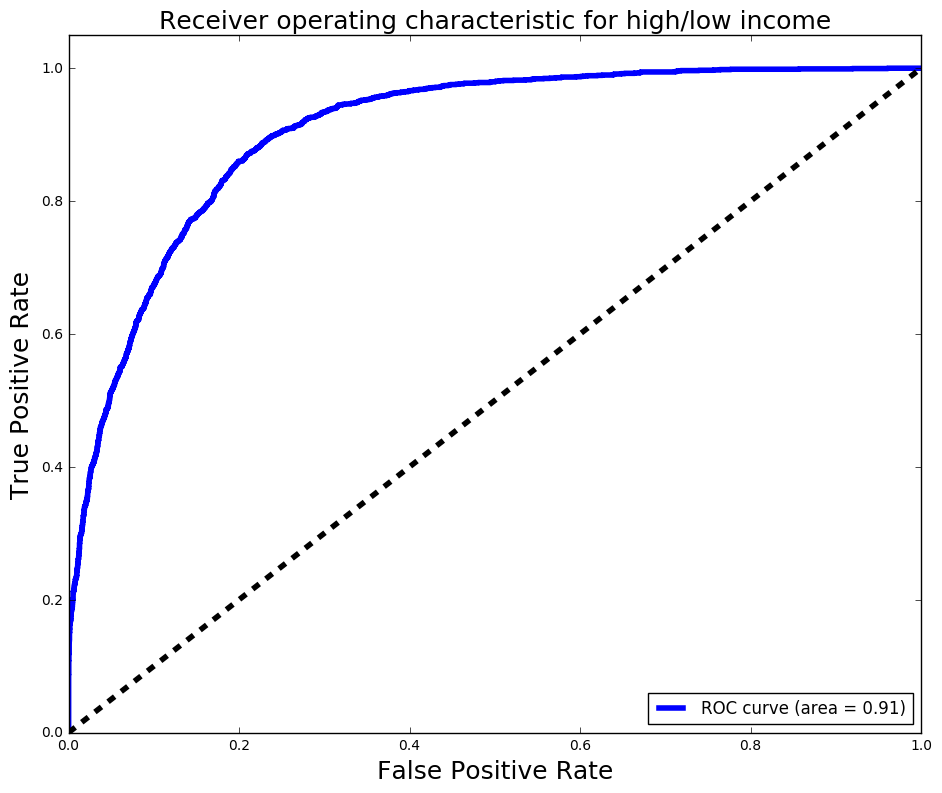

In [285]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(y_test,cv_pred)
roc_auc_score(y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

           predicted_over50k  predicted_under50k
over_50k                 707                 475
under_50k                258                3444
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      3702
          1       0.73      0.60      0.66      1182

avg / total       0.84      0.85      0.84      4884


        predicted_over50k  predicted_under50k
over_50k                 708                 474
under_50k                259                3443
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      3702
          1       0.73      0.60      0.66      1182

avg / total       0.84      0.85      0.84      4884

In [ ]:
'C': 0.52714285714285714, 'penalty': 'l1'

In [276]:
submission = pd.read_csv('classification_challenge_submission.csv')
submission
del submission['Unnamed: 0']
del submission['country']
#submission['sex_race'] = submission['sex'] + "_" + submission['race']
d={'11th':"HS-non-grad", 'HS-grad':'HS-grad', '10th':"HS-non-grad", 'Assoc-voc':'College', 'Bachelors':'College', \
  'Some-college':'Some-college','Assoc-acdm':'College', '12th':"HS-non-grad", 'Doctorate':'Higher-Level Education', \
  'Masters':'Higher-Level Education','9th':"HS-non-grad", '5th-6th':"HS-non-grad",'1st-4th':"HS-non-grad",\
  'Prof-school':'College', '7th-8th':"HS-non-grad", 'Preschool':"HS-non-grad"}
submission['education'] = submission['education'].apply(lambda x: d[x])
submission.head()

,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week
0,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20
1,17,Private,HS-non-grad,8,Never-married,Sales,Own-child,White,Male,0,0,40
2,24,Private,College,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40
3,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40
4,59,Private,College,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60


In [277]:
"""Clean/munge your data."""
sub_df = pd.get_dummies(submission,columns = ['type_employer','education','marital', 'occupation','relationship','race','sex'])
#y = sub_df['income'].copy()
#del df1['income']
#del df1['country']
X_sub = sub_df
# print X_sub.shape
# print X.shape

In [278]:
sub_y_pred = cv_model.predict(X_sub)
y_score_sub = cv_model.decision_function(X_sub)

ValueError: X has 53 features per sample; expecting 54

In [ ]:
sub_yscore = y_score_sub.reshape((len(y_score_sub),1))
sub_yscore.shape

In [ ]:
X_sub['y_score'] = sub_yscore

In [ ]:
X_sub.to_csv('Team One - Sara, Maria, Thomas, Amish - Try 2.csv')

In [291]:
[x for x in df1.columns if x not in X_sub.columns]

[]